<a href="https://colab.research.google.com/github/lapatradaa/shap/blob/main/fix%20mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import shutil

In [70]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,...,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,...,7.107492,7.0,0.000003,Female,0.0
1,1,7,F,Normal,Both,...,7.020138,7.0,0.000025,Female,0.0
2,2,7,F,Normal,Both,...,6.975561,7.0,0.000808,Female,0.0
3,3,7,F,Normal,Both,...,6.938187,7.0,0.000107,Female,0.0
4,4,7,F,Normal,Both,...,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,...,25.299234,25.0,0.999988,Male,1.0
4185,4185,25,M,Normal,Rt,...,24.729193,25.0,0.999987,Male,1.0
4186,4186,25,M,Normal,Rt,...,24.564425,25.0,1.000000,Male,1.0
4187,4187,25,M,Normal,Rt,...,24.113144,24.0,1.000000,Male,1.0


In [72]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.107492,7.0,0.000003,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.020138,7.0,0.000025,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,6.975561,7.0,0.000808,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,6.938187,7.0,0.000107,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25.299234,25.0,0.999988,Male,1.0
4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24.729193,25.0,0.999987,Male,1.0
4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24.564425,25.0,1.000000,Male,1.0
4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24.113144,24.0,1.000000,Male,1.0


In [73]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [74]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [75]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


In [76]:
df_test_gender = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_gender = df_test_gender.iloc[:,1:]
print(df_test_gender.shape)
df_test_gender

(943, 13)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.359797,21.0,3.044503e-09,Female,0.0


In [77]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.359797,21.0,3.044503e-09,Female,0.0


In [78]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

In [79]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [80]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [81]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

In [82]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.359797,21.0,3.044503e-09,Female,0.0


In [83]:
# ทำค่า Prob
c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)
#Select rows where 'prob' is greater than 0.9
d = c[c['prob'] > 0.90]

# Display the selected rows
d


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.0,3.044503e-09,Female,0.0,1.000000


In [84]:
selected_test = d
selected_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.0,3.044503e-09,Female,0.0,1.000000


In [85]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,...,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,21.0,3.044503e-09,Female,0.0,1.000000


In [86]:
background_test = process_input(sdf_test)

Processing image 1/753
Processing image 2/753
Processing image 3/753
Processing image 4/753
Processing image 5/753
Processing image 6/753
Processing image 7/753
Processing image 8/753
Processing image 9/753
Processing image 10/753
Processing image 11/753
Processing image 12/753
Processing image 13/753
Processing image 14/753
Processing image 15/753
Processing image 16/753
Processing image 17/753
Processing image 18/753
Processing image 19/753
Processing image 20/753
Processing image 21/753
Processing image 22/753
Processing image 23/753
Processing image 24/753
Processing image 25/753
Processing image 26/753
Processing image 27/753
Processing image 28/753
Processing image 29/753
Processing image 30/753
Processing image 31/753
Processing image 32/753
Processing image 33/753
Processing image 34/753
Processing image 35/753
Processing image 36/753
Processing image 37/753
Processing image 38/753
Processing image 39/753
Processing image 40/753
Processing image 41/753
Processing image 42/753
P

In [87]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [88]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [89]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

In [90]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
/content/efficientnet_keras_transfer_learning


In [91]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [92]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [93]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [94]:
!pip install shap==0.44.1

In [95]:
import shap

In [96]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [97]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

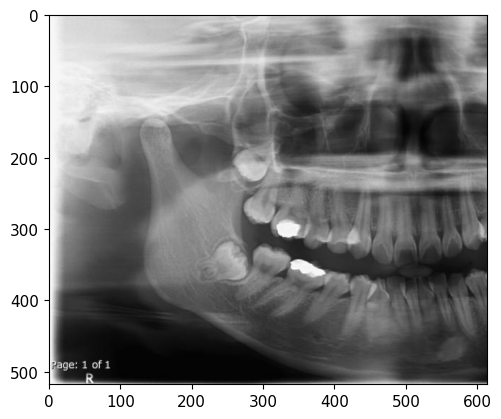

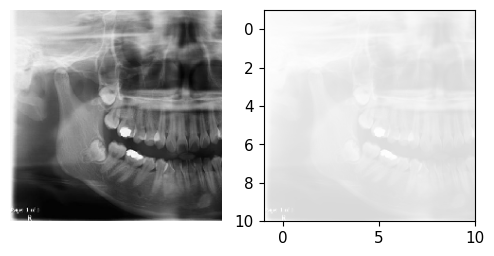

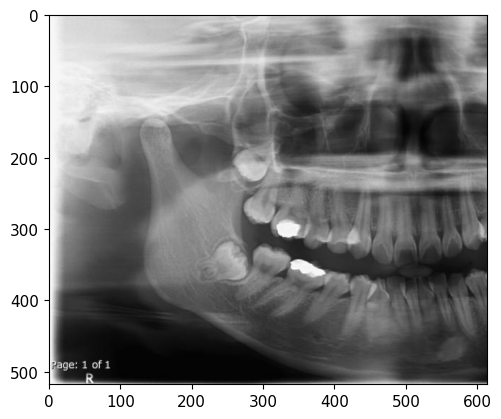

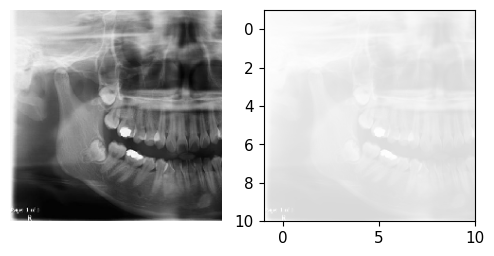

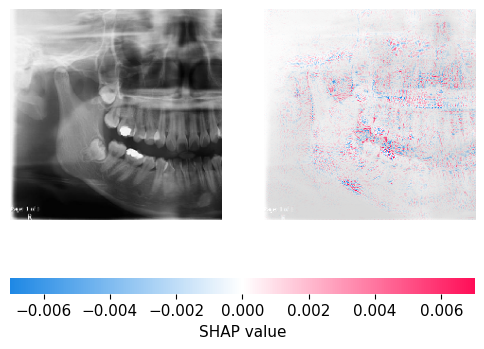

In [98]:
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

In [99]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [100]:
import numpy as np
import matplotlib.pyplot as plt

#pos percentile
#pos
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive = np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0

# Flatten the array and normalize the positive values
flattened_array_pos = positive.flatten()
normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_positive = normalized_array_pos.reshape(positive.shape)

# Create grayscale image
grayscale_image_pos = normalized_positive / 3.0
grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_positive = grayscale_image_positive.squeeze()

# Apply threshold
percentile_pos = np.percentile(grayscale_image_positive, 95)
grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0

# Filter out zero values
filtered_array_grayscale_pos_thresholded = grayscale_pos_thresholded[grayscale_pos_thresholded != 0]

# Print the full filtered array without truncation
np.set_printoptions(threshold=np.inf)
print('filtered_array_grayscale_pos_thresholded')
print(filtered_array_grayscale_pos_thresholded)

# Print the thresholded grayscale image array
print('grayscale_pos_thresholded')
print(grayscale_pos_thresholded)


filtered_array_grayscale_pos_thresholded
[0.02249943 0.02087654 0.03024537 0.02733165 0.02368463 0.02344439 0.02146869 0.02897661 0.03380061 0.03489908 0.0254458  0.02205466 0.02091955 0.0252057  0.02255206 0.02362577 0.02456016 0.03614745 0.0359634  0.03313294 0.025275   0.02541493 0.02742411 0.02132684 0.02294471 0.02082741 0.02700718 0.02189206 0.02681832
 0.02562427 0.0262804  0.02371312 0.03674626 0.02719049 0.03523642 0.04567432 0.03166244 0.0315678  0.02846025 0.03586092 0.04937534 0.05365621 0.02061606 0.02154871 0.0250062  0.02101315 0.04806658 0.03560994 0.02832958 0.0293341  0.02772829 0.02601226 0.05083055 0.05276883 0.03470825 0.02832197 0.02090376 0.02948223
 0.02121021 0.02059431 0.0211242  0.0218577  0.03168985 0.04037244 0.04675574 0.0329591  0.06794997 0.06555263 0.02228341 0.0230291  0.02390071 0.03470971 0.04519433 0.05084912 0.05637923 0.02274462 0.02424785 0.02870144 0.02159158 0.02306226 0.03630343 0.0421362  0.03695276 0.02078759 0.02756379 0.02806718 0.0238327


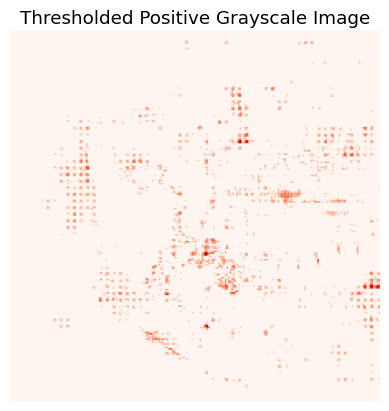

In [101]:
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()

In [102]:
import pandas as pd

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.1):
    df_nms = pd.DataFrame()
    class_ids = df['class'].unique()

    for class_id in class_ids:
        df_class = df[df['class'] == class_id].copy()

        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        retained_indices = []
        iou_values = []

        for i in range(len(df_class_sorted)):
            if i in retained_indices:
                continue

            retained_indices.append(i)
            iou_values.append(1.0)

            for j in range(i + 1, len(df_class_sorted)):
                if j in retained_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]
                iou_value = compute_iou(boxA, boxB)

                if iou_value > iou_threshold:
                    retained_indices.append(j)
                    iou_values.append(iou_value)

        df_nms_class = df_class_sorted.iloc[retained_indices].reset_index(drop=True)

        df_nms_class['iou'] = iou_values

        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_pos(image_path, df, grayscale_image):
    selected_bboxes = []  #สร้าง list ว่าง มาเก็บกล่องที่มีค่า SHAP เกิน IoU ที่ 0.1
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path) #  เปิดภาพจาก path
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency // plot จากสีเทา ให้เป้นน สีแดง ทับลงไป
    ax.imshow(grayscale_image, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():  #df ที่ตัวแบบทนายมาทั้งหมด  จะทำการ loop เก็บค่าตห.จากตาราง
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name, IoU = row['confidence'], row['class'],row['name'], row['iou']

        # Convert coordinates to absolute values // เปลี่ยนจากตห.ของกล่อง ให้ตามขนาดภาพที่ใส่เข้าไป (ม้้ง)
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image //คำนวณบริเวณที่สินใจ
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1]) # แปลงพิกัดกรอบสีเหลี่ยมให้เข้ากับขนาดรูปภาพ โดย *พิกัด กับขนาดของ grayscale_image
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax] # เลือก roi บริเวณที่สนใจ  จากgrayscale_image โดยตัด roi ออกมาเป็น nparray

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1]) #Calculate the percentage ของ pixels ที่ไม่เป็น 0 แล้วหารด้วย pixels ทั้งหมด

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':nonzero_percentage})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch //สร้างกล่อง
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin), #abs แปลงเป็นพิกัดในหน่วย  pixel ให้ตรงกับขนาดภาพจริง
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='r', # เปลี่ยนสีกล่อง
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}' # ข้อความที่จะ Plot บนกล่อง
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5)) # ตห + สีของตัวอักษร ขนาด front


    # Show the plot
    plt.show()

    return selected_bboxes, value_than_IoU

In [104]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_neg(image_path, df, grayscale_image):
    selected_bboxes = []
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name, IoU = row['confidence'], row['class'],row['name'], row['iou']

        # Convert coordinates to absolute values
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1])
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax]

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1])

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box#เลือกกล่องที่มีค่า shap ในกล่องมากกว่า 10% ของทั้งหมด
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':nonzero_percentage})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin),
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='b',
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}'
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))


    # Show the plot
    plt.show()

    return selected_bboxes,  value_than_IoU

In [105]:
# load YOLO ที่Train มา
# Replace with code to load your trained YOLO model
weights_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/papers/gpt/Yolo_v5/best.pt'

# Load YOLOv5 model from Google Drive
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-18 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [106]:
from PIL import Image
Image_E244_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg')
Image_E244_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg'


In [107]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_E244_23Y_F = yolo_model(Image_E244_23Y_F) # results = ผลจากการทำนาย
df_E244_23Y_F = results_E244_23Y_F.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index


In [108]:
 results_E244_23Y_F.pandas().xyxyn[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.413439,0.615943,0.556066,0.787112,0.930287,13,Lower Second Molar
1,0.333462,0.604812,0.462590,0.736952,0.922186,11,Lower Third Molar
2,0.465990,0.654569,0.642072,0.826653,0.914115,5,Lower First Molar
3,0.193908,0.266715,0.296632,0.423032,0.899092,0,Condyle
4,0.696205,0.013361,0.966492,0.439450,0.893782,7,Nasal
5,0.566833,0.691747,0.695932,0.853802,0.893508,6,Lower Second Premolar
6,0.438069,0.405748,0.534253,0.576854,0.892715,8,Upper Second Molar
7,0.198947,0.583434,0.326849,0.809255,0.890187,3,Mandibular angle
8,0.411414,0.335667,0.522426,0.463951,0.887042,15,Upper Third Molar
9,0.672965,0.446699,0.741796,0.670621,0.878894,19,Upper Canine


In [109]:
df_E244_23Y_F_filtered_nms = nms_per_class(df_E244_23Y_F,iou_threshold=0.5)


In [110]:
#E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

In [111]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

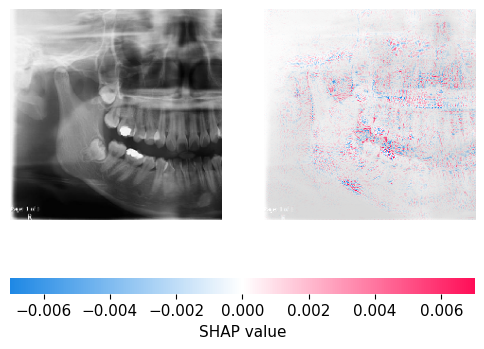

In [112]:
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

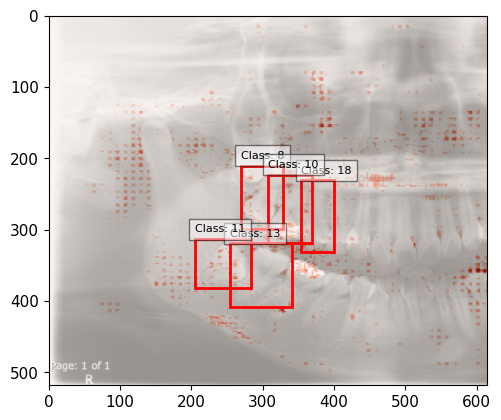

In [115]:
selected_bboxes_E244_23Y_F_pos = plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [116]:
pd.DataFrame(selected_bboxes_E244_23Y_F_pos)

,0,1,2,3,4
0,"{'xmin': 253.85145795345306, 'ymin': 319.05851...","{'xmin': 204.74544835090637, 'ymin': 313.29241...","{'xmin': 268.97430247068405, 'ymin': 210.17731...","{'xmin': 353.6833447217941, 'ymin': 230.948763...","{'xmin': 307.9614098072052, 'ymin': 223.264048..."
1,0.106571,0.128736,0.113553,0.103693,0.165188


In [132]:
import numpy as np
import matplotlib.pyplot as plt

#pos percentile
#pos
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive = np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0

# Flatten the array and normalize the positive values
flattened_array_pos = positive.flatten()
normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_positive = normalized_array_pos.reshape(positive.shape)

# Create grayscale image
grayscale_image_pos = normalized_positive / 3.0
grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_positive = grayscale_image_positive.squeeze()

# Apply threshold
percentile_pos = np.percentile(grayscale_image_positive, 95)
grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0

# Filter out zero values
#filtered_array_grayscale_pos_thresholded = grayscale_pos_thresholded[grayscale_pos_thresholded != 0]

# Print the full filtered array without truncation
np.set_printoptions(threshold=np.inf)
print('grayscale_pos_thresholded')
print(grayscale_pos_thresholded)


grayscale_pos_thresholded
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         

In [133]:

import numpy as np
import pandas as pd

df_bboxes = pd.DataFrame(selected_bboxes_E244_23Y_F_pos[0])
# Function to check which array values are inside bounding boxes
def get_values_in_bounding_boxes_pos(array, df_bboxes):
    results = []
    for index, row in df_bboxes.iterrows():
        bbox_values = array[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax'])]
        results.append({
            'class': row['class'],
            'name': row['name'],
            'values': bbox_values
        })
    return results

# Get the values inside bounding boxes
values_in_bboxes_pos = get_values_in_bounding_boxes_pos(grayscale_pos_thresholded, df_bboxes)

# Function to calculate the mean of values inside bounding boxes for each class
def calculate_mean_values_in_bounding_boxes_pos(values_in_bboxes_pos):
    mean_values = []
    for bbox in values_in_bboxes_pos:
        mean_value = np.mean(bbox['values'])
        mean_values.append({
            'class': bbox['class'],
            'name': bbox['name'],
            'mean_value': mean_value
        })
    return mean_values

# Calculate the mean values
mean_values_in_bboxes_pos = calculate_mean_values_in_bounding_boxes_pos(values_in_bboxes_pos)

# Display the results
mean_values_in_bboxes_pos

[{'class': 13, 'name': 'Lower Second Molar', 'mean_value': nan},
 {'class': 11, 'name': 'Lower Third Molar', 'mean_value': nan},
 {'class': 8, 'name': 'Upper Second Molar', 'mean_value': nan},
 {'class': 18, 'name': 'Upper Second Premolar', 'mean_value': nan},
 {'class': 10, 'name': 'Upper First Molar', 'mean_value': nan}]